## 1 使用18000 的基因数据进行相似度验证
- 在 pre 脚本里生成这个文件 （稀疏矩阵）
- 在 ipynb 中，读取 task2_result，提取细胞核的坐标，转换为 idx，存储为一个（字典？）
- 在这个循环中，累加并保存一个细胞核对应基因表达的 （字典）id→list(18000)
- 计算特定区域的 idx，保存到一个 list 中
- enumerate 这个 list，计算其基因表达相似度
- 用 list 的和再算相似度

In [1]:
from scipy.sparse import load_npz
import pandas as pd

# 加载稀疏矩阵
# sparse_matrix = load_npz('dataset/full_gene_sparse_matrix.npz')
sparse_matrix = load_npz('sparse_matrix.npz')

# 转换为密集矩阵
dense_matrix = sparse_matrix.todense()

# 创建 DataFrame
df = pd.DataFrame(dense_matrix)


: 

In [3]:
import math
def xy2idx(x,y):
    return int(math.floor(int(x)) * math.ceil(1200) + math.floor(int(y)))

In [4]:
nuclei = pd.read_csv('/mnt/md0/lei/projects/CellSegmentsation/CellSegmentation/results/task2_result.txt', sep=' ', header=None)
nuclei[0]=nuclei[0].astype(int)
nuclei[1]=nuclei[1].astype(int)
nuclei[3]=nuclei[3].astype(int)

In [25]:
# for nuclei[3] 139,639,955,34, get all x and y (nuclei[0] and nuclei[1])
import numpy as np
import matplotlib.pyplot as plt

cell = 639

coordinate = nuclei[(nuclei[3] == cell)][[0, 1]].values

print(coordinate.shape)

cor_idx = [xy2idx(x, y) for x, y in coordinate]
expression_sums = df.loc[cor_idx].sum()
nuclei_exp = (expression_sums.values.T)
x_center = np.mean(coordinate[:, 0])
y_center = np.mean(coordinate[:, 1])
center = (math.floor(x_center), math.floor(y_center))
from scipy.stats import spearmanr, pearsonr

cor = []
sim = []
for i in range(100):
    x_tmp = center[0] + 50 - i
    y_tmp = center[1]
    cor.append((x_tmp, y_tmp))
    idx_tmp = xy2idx(x_tmp, y_tmp)
    exp_tmp = df.loc[idx_tmp].values.T
    c, p = pearsonr(nuclei_exp, exp_tmp)
    if not c > 0:
        c = 0
    sim.append(c)

(141, 2)


[0.013422445173161022, 0.012925388033669433, 0.01113532380425137, 0.005205208886417558, 0.0121214197993719, 0.012722691749180715, 0.018610064188674315, 0.017892485982967263, 0.018935895906024812, 0.010389366383890635, 0.004792665308049507, 0, 0, 0.002587194950663023, 0.002350085060088778, 0.0016011636740909977, 0.0018070055083251762, 0.007624103971980645, 0.0050207073781173605, 0.006486287504889829, 0.008700574144173828, 0.008221211723413, 0, 0, 0, 0, 0, 0, 0, 0, 0.027033740130430996, 0.027033740130430996, 0.027451175485266197, 0.025670806281709504, 0.024358033538043906, 0.006169732555990708, 0.02331557891334023, 0.030751417131949524, 0.041517242137878545, 0.10924165096221147, 0.11337375271043786, 0.17933899939238493, 0.277930922330946, 0.35217380756251926, 0.3159984515139216, 0.3480553796468408, 0.41909083659084834, 0.3858852104090311, 0.3521226208755824, 0.3744015219378418, 0.4640368792840264, 0.4890274643343184, 0.5333144808542789, 0.6014579838564952, 0.5852163859154547, 0.512228799

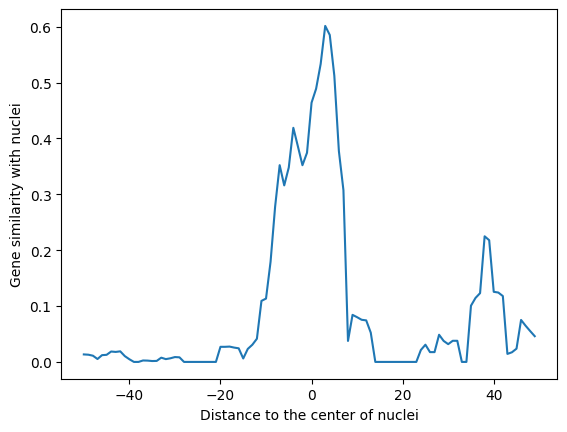

In [26]:
print(sim)
x_values = [i for i in range(-50, 50)]
plt.plot(x_values,sim)
plt.xlabel('Distance to the center of nuclei')
plt.ylabel('Gene similarity with nuclei')
plt.show()

## 2 使用 conv 后的 180000 基因数据进行验证
- 重建二维的表达矩阵
- 计算邻域和
- 更新基因表达向量

In [27]:
nuclei = pd.read_csv('/mnt/md0/lei/projects/CellSegmentsation/CellSegmentation/results/task2_result.txt', sep=' ', header=None)
nuclei[0]=nuclei[0].astype(int)
nuclei[1]=nuclei[1].astype(int)
nuclei[3]=nuclei[3].astype(int)
unique_cells = np.unique(nuclei[3])
print(unique_cells.max())

1118


In [28]:
unique_cells.min()

0

In [30]:
unique_cells.shape

(1118,)